In [2]:
import os
import matplotlib.pyplot as plt
import netCDF4
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.mpl.ticker as cartopyticker
plt.style.use('dark_background')
coast = cfeature.GSHHSFeature(scale="f")
plt.rcParams.update({'font.size': 18})

## Files and directories

In [16]:
datadir = "../../data/"
figdir = "../../figures/cyclones/"
if not(os.path.exists(figdir)):
    os.makedirs(figdir)
    
datafile = os.path.join(datadir, "IBTrACS.ALL.v04r00.nc")
heatfile = os.path.join(datadir, "cyclone_heat.nc")
os.path.isfile(datafile), os.path.isfile(heatfile)

(True, True)

## Read data

In [5]:
with netCDF4.Dataset(datafile, "r") as nc:
    lon = nc.variables["lon"][:].compressed()
    lat = nc.variables["lat"][:].compressed()

In [9]:
with netCDF4.Dataset(heatfile, "r") as nc:
    lonh = nc.variables["lon"][:]
    lath = nc.variables["lat"][:]
    heat = nc.variables["heatmap"][:]

## Make figure
### Setup projection

In [10]:
theproj = ccrs.LambertAzimuthalEqualArea(central_longitude=200, central_latitude=0.0)
#theproj = ccrs.Mollweide(central_longitude=180.)
datacrs = ccrs.PlateCarree()

### Plot data points

In [11]:
fig = plt.figure(figsize=(10, 10))
ax = plt.subplot(111, projection=theproj)
ax.plot(lon[::10], lat[::10], "co", ms=.2, transform=datacrs)

ax.coastlines(color="w", linewidth=.25, facecolor=".25")
plt.savefig(os.path.join(figdir, "cyclones_LAEA_2"), dpi=300, bbox_inches="tight")
plt.close()

/home/ctroupin/Software/PythonEnvs/twitter-data/lib/python3.10/site-packages/Cartopy-0.18.0-py3.10-linux-x86_64.egg/cartopy/crs.py:245: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
/home/ctroupin/Software/PythonEnvs/twitter-data/lib/python3.10/site-packages/Cartopy-0.18.0-py3.10-linux-x86_64.egg/cartopy/crs.py:297: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for line in multi_line_string:
/home/ctroupin/Software/PythonEnvs/twitter-data/lib/python3.10/site-packages/Cartopy-0.18.0-py3.10-linux-x86_64.egg/cartopy/crs.py:364: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Chec

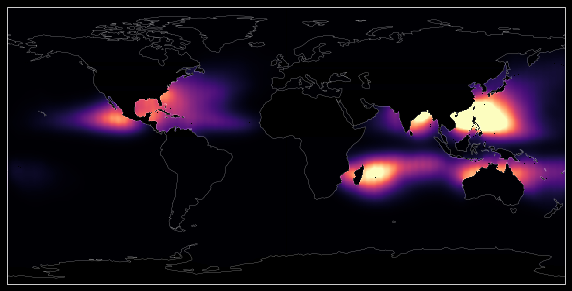

In [35]:
cmap = plt.cm.magma
cmap.with_extremes(under=".25")
fig = plt.figure(figsize=(10, 10))
ax = plt.subplot(111, projection=datacrs)
#ax.plot(lon[::10], lat[::10], "co", ms=.2, transform=datacrs)

ax.pcolormesh(lonh, lath, heat, vmin=0.000001, vmax=0.00025, cmap=cmap, zorder=2)
ax.coastlines(color="w", linewidth=.2, zorder=3)
plt.savefig(os.path.join(figdir, "cyclones_LAEA_heat"), dpi=300, bbox_inches="tight")

plt.show()